## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Hypothesis
#### 4. Data prep for regression analysis
#### 5. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define Master Path

path = r'/Users/jagpreetbatth/Desktop/Career/Python/COVID-19 Analysis'

In [4]:
# Verify path

path

'/Users/jagpreetbatth/Desktop/Career/Python/COVID-19 Analysis'

In [5]:
# Import Covid-19 Dataset

df= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'COVID-19_analysis_clean.csv'))

### 2. Data cleaning

In [6]:
# Print head

df.head()

,Unnamed: 0,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,228,Zimbabwe,-19.015438,29.154857,2020-01-22,0,0,0,0.0,Africa
1,227,Zambia,-13.133897,27.849332,2020-01-22,0,0,0,0.0,Africa
2,257,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0.0,Eastern Mediterranean
3,255,Western Sahara,24.215500,-12.885800,2020-01-22,0,0,0,0.0,Africa
4,237,West Bank and Gaza,31.952200,35.233200,2020-01-22,0,0,0,0.0,Eastern Mediterranean


In [7]:
# Print tail

df.tail()

,Unnamed: 0,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49059,48811,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667.0,Africa
49060,48810,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52.0,Europe
49061,48809,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973.0,Africa
49062,48808,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991.0,Europe
49063,48807,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796.0,Eastern Mediterranean


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49064 non-null  int64  
 1   Country     49064 non-null  object 
 2   Lat         49064 non-null  float64
 3   Long        49064 non-null  float64
 4   Date        49064 non-null  object 
 5   Confirmed   49064 non-null  int64  
 6   Deaths      49064 non-null  int64  
 7   Recovered   49064 non-null  int64  
 8   Active      49046 non-null  float64
 9   WHO Region  49064 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ MB


In [9]:
df.dtypes

Unnamed: 0      int64
Country        object
Lat           float64
Long          float64
Date           object
Confirmed       int64
Deaths          int64
Recovered       int64
Active        float64
WHO Region     object
dtype: object

In [10]:
type(df['Date'][0])

str

In [70]:
# Print Shape

df.shape

(49064, 10)

In [11]:
df.columns

Index(['Unnamed: 0', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [12]:
# Dropping unnecessary 'Unnamed: 0' column from df - redundant

df = df.drop(columns = ['Unnamed: 0'])

In [13]:
# Confirm Drop of 'Unnamed: 0'

df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Zimbabwe,-19.015438,29.154857,2020-01-22,0,0,0,0.0,Africa
1,Zambia,-13.133897,27.849332,2020-01-22,0,0,0,0.0,Africa
2,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0.0,Eastern Mediterranean
3,Western Sahara,24.215500,-12.885800,2020-01-22,0,0,0,0.0,Africa
4,West Bank and Gaza,31.952200,35.233200,2020-01-22,0,0,0,0.0,Eastern Mediterranean


In [14]:
# Dropping unnecessary 'Active' column from df - Not needed for final Analysis

df = df.drop(columns = ['Active'])

In [15]:
# Confirm Drop of 'Active'

df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,Zimbabwe,-19.015438,29.154857,2020-01-22,0,0,0,Africa
1,Zambia,-13.133897,27.849332,2020-01-22,0,0,0,Africa
2,Yemen,15.552727,48.516388,2020-01-22,0,0,0,Eastern Mediterranean
3,Western Sahara,24.215500,-12.885800,2020-01-22,0,0,0,Africa
4,West Bank and Gaza,31.952200,35.233200,2020-01-22,0,0,0,Eastern Mediterranean


In [16]:
# Print shape after dropping column

df.shape

(49064, 8)

#### Missing values

In [17]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country       0
Lat           0
Long          0
Date          0
Confirmed     0
Deaths        0
Recovered     0
WHO Region    0
dtype: int64

#### Duplicates check

In [18]:
dups = df.duplicated()

In [19]:
dups.shape # No dups

(49064,)

#### Extreme values checks

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

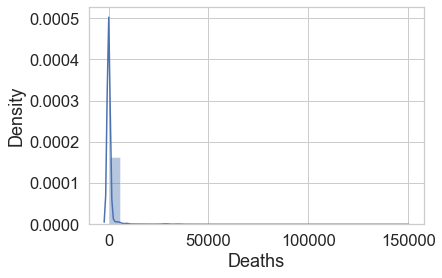

In [20]:
sns.distplot(df['Deaths'], bins=25) # Shows extreme values

# No extreme vaules noted

In [35]:
df['Deaths'].mean() # Check the mean

884.2509171694114

In [36]:
df['Deaths'].median() # Check the median

2.0

In [37]:
df['Deaths'].max() # Check the max

148011

### 3. Data prep for regression analysis 

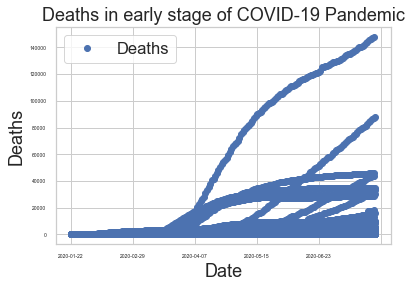

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Date', y='Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
matplotlib.rc('xtick', labelsize=1) 
matplotlib.rc('ytick', labelsize=1)
plt.title('Deaths in early stage of COVID-19 Pandemic')  
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

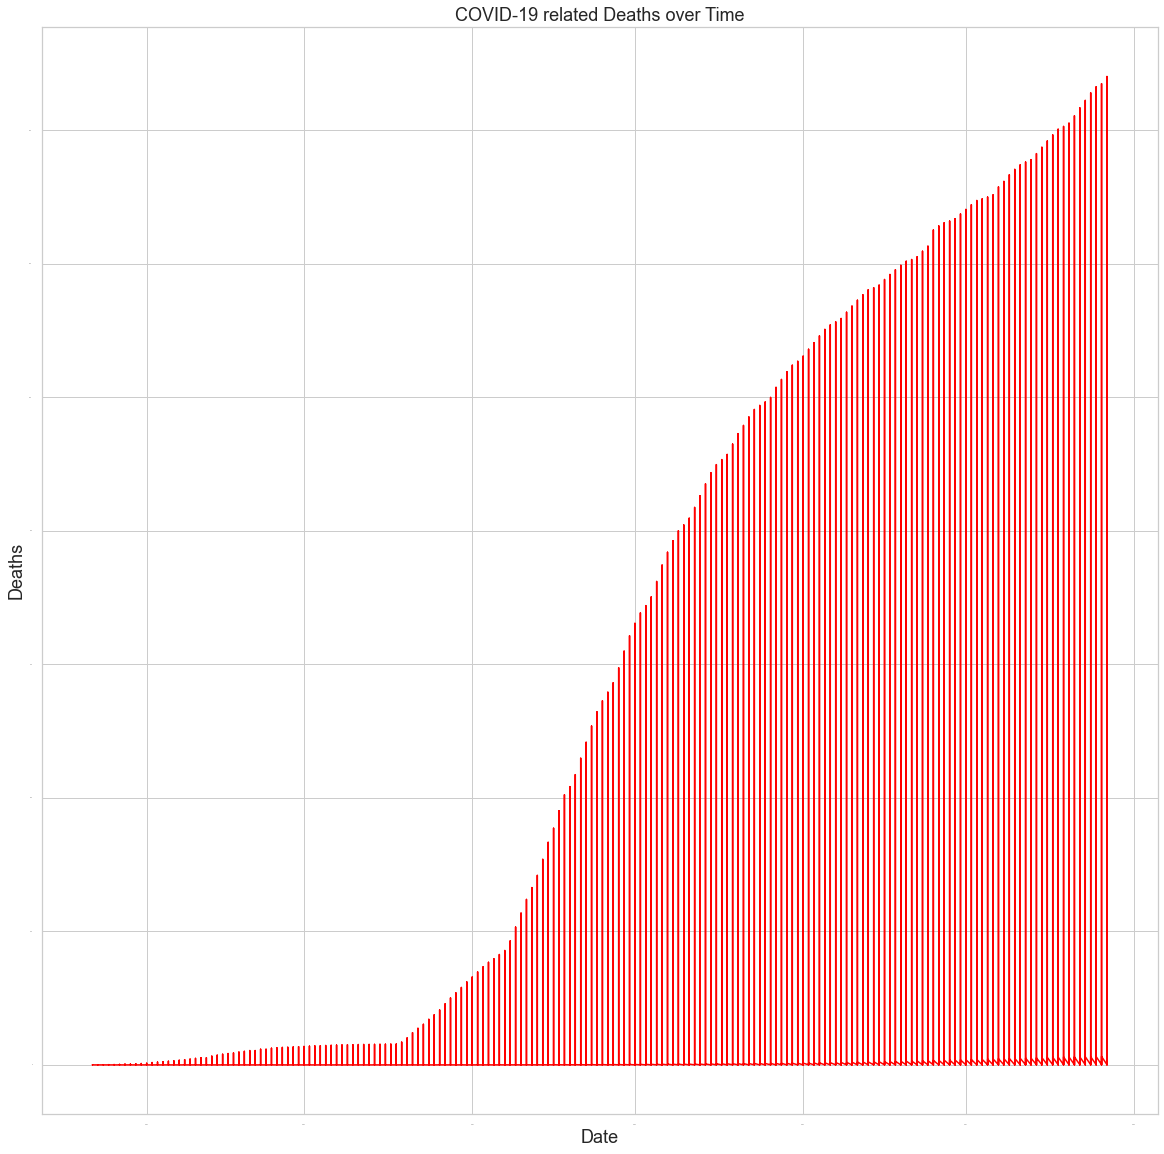

In [83]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 20))

# Add x-axis and y-axis
ax.plot(df['Date'],
        df['Deaths'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="COVID-19 related Deaths over Time")

plt.show()

In [114]:
df['Date']=pd.to_datetime(df['Date'])

In [117]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Confirmed'].values.reshape(-1,1)
y = df['Deaths'].values.reshape(-1,1)

In [118]:
X

array([[    0],
       [    0],
       [    0],
       ...,
       [27973],
       [ 4880],
       [36263]])

In [119]:
y

array([[   0],
       [   0],
       [   0],
       ...,
       [1163],
       [ 144],
       [1269]])

In [120]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Hypothesis 
#### Increased Confrimed Cases will lead to increased Deaths in the intial time period if the COVID-19 Pandemic. This is alarming as this shows that the diseases is deadly if not treated when confrimed as a postive COVID-19 test. 

### 4. Regression analysis

In [121]:
# Create a regression object.

regression = LinearRegression()  # Defined Regression object to fit onto the training set.

In [122]:
# Fit regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [123]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

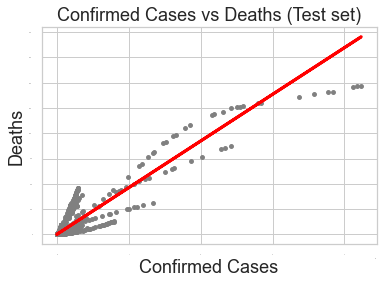

In [124]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Confirmed Cases vs Deaths (Test set)')
plot_test.xlabel('Confirmed Cases')
plot_test.ylabel('Deaths')
plot_test.show()

#### The line appears to fit the data in the intial time frame but does increase distance from the actual values as the amoutn of deaths increase showing that outr model can not for certian predicts deaths based on a positive Confirmed COVID test in larger data sets. 

In [125]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [126]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04613046]]
Mean squared error:  7097711.551525344
R2 score:  0.8264696305659485


### MSE and R2 Values
#### Note the increased MSE value indicating the average of the squared difference between the estimated values and the true values is large. This requires increased model adjusments to attain a lower MSE, making the model closer to true values. 
#### Note the R2 value of {.82] which is closer to 2 indicating a good fit to the data. 

In [127]:
y_predicted

array([[127.8397048 ],
       [142.4630608 ],
       [112.33987006],
       ...,
       [185.54891094],
       [146.24575856],
       [206.12309635]])

In [128]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,24,127.839705
1,0,142.463061
2,0,112.339870
3,0,112.339870
4,83,228.542500
5,0,112.708914
6,0,112.339870
7,705,950.299686
8,3,139.972016
9,175,363.105054


### Compare Actual and Y-predicted values
#### There is a significant difference in the Predicted and the actual values, indicating our model does not fit the actual data and we need to fine tune the model for decreased variance. 

#### Compare how the regression fits the training set

In [129]:
# Predict.

y_predicted_train = regression.predict(X_train) # Predicting X_train!

In [130]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [131]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04613046]]
Mean squared error:  6520530.844649296
R2 score:  0.8345828474223738


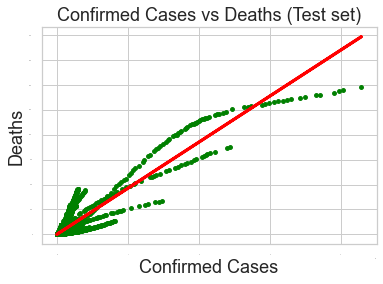

In [132]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Confirmed Cases vs Deaths (Test set)')
plot_test.xlabel('Confirmed Cases')
plot_test.ylabel('Deaths')
plot_test.show()

### The model performed fairly well in the test set much like the training set, since the MSE was a high number there was an increased amount of variance in our data. The R2 score being closer to 1 indicated it was a good fit, which may have been due to increased number of data points available for modeling.